In [1]:
import os
from IPython.display import Audio
import numpy as np
import librosa.display
import matplotlib.pyplot as plt
import warnings
import pandas as pd
import sklearn
from sklearn.preprocessing import MinMaxScaler, RobustScaler,StandardScaler
import librosa
import librosa.display
import tensorflow as tf
from tqdm import tqdm
from xgboost import XGBClassifier
warnings.filterwarnings(action='ignore')

2022-09-30 09:39:52.763683: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.


In [2]:
#Configuration
SR=32000
hop_length = SR * 0.01
n_fft = SR * 0.025
win_length = n_fft

In [3]:
# 오디오 로드 및 mfcc 추출
def audioload(path,sr=32000):
    y,sr=librosa.load(path,sr)
    mels=librosa.feature.melspectrogram(y,sr=sr,n_mels=256)
    S = np.abs(mels)
    log_S = librosa.power_to_db(S,ref = np.max)
    mfcc = librosa.feature.mfcc(y=y, S=log_S, sr=SR, n_mfcc=32, n_fft = n_fft, win_length = win_length, hop_length = hop_length)
    mean_features=[]
    for mfcc_feature in mfcc:
        mean_feature=np.mean(mfcc_feature) #추상화를 위해 평균값을 사용
        mean_features.append(mean_feature)
    #mean_features.append((mfcc**2).sum())
    return mean_features

In [41]:
#폴더별 나누기
sci_dataframe=pd.DataFrame()
mci_dataframe=pd.DataFrame()
ad_dataframe=pd.DataFrame()
for step_num in tqdm(range(1,12)):
    SCI="/data/음성파일/치매원본음성/가천대에서받은원본/NIA/2021-NIA-FINAL-TOTAL/"+str(step_num)+"/SCI"
    AD="/data/음성파일/치매원본음성/가천대에서받은원본/NIA/2021-NIA-FINAL-TOTAL/"+str(step_num)+"/AD"
    MCI="/data/음성파일/치매원본음성/가천대에서받은원본/NIA/2021-NIA-FINAL-TOTAL/"+str(step_num)+"/MCI"
    sci_array_list=dict()
    
    for sci_files in os.listdir(SCI):
        sci_path=os.path.join(SCI,sci_files)
        sci_array=audioload(sci_path)
        if step_num == 11:
            sci_array_list[sci_files[:-9]]=sci_array
            print(sci_files[:-9])
            
        else:
            sci_array_list[sci_files[:-8]]=sci_array
        
    sci_dataframe = sci_dataframe.append(pd.DataFrame(sci_array_list), ignore_index=True)
        
    #sci_df=pd.DataFrame(data=sci_array_list,index=["1"])

    mci_array_list=dict()
    for mci_files in os.listdir(MCI):
        mci_path=os.path.join(MCI,mci_files)
        mci_array=audioload(mci_path)
        if step_num == 11:
            mci_array_list[mci_files[:-9]]=mci_array
            
        else:
            mci_array_list[mci_files[:-8]]=mci_array
        
    mci_dataframe = mci_dataframe.append(pd.DataFrame(mci_array_list), ignore_index=True)
        
        
    #mci_df=pd.DataFrame(data=mci_array_list,index=["1"])
        #print(mci_array)
    ad_array_list=dict()
    for ad_files in os.listdir(AD):
        ad_path=os.path.join(AD,ad_files)
        ad_array=audioload(ad_path)
        if step_num == 11:
            ad_array_list[ad_files[:-9]]=ad_array
            
        else:
            ad_array_list[ad_files[:-8]]=ad_array

        
    ad_dataframe = ad_dataframe.append(pd.DataFrame(ad_array_list), ignore_index=True)
        
        
    #ad_df=pd.DataFrame(data=ad_array_list,index=["1"])
        #print(mci_array)

 91%|████████████████████████████████████████████████████████████████████████▋       | 10/11 [1:02:53<08:32, 512.13s/it]

dc0f260b-7aff-428f-9488-6bdef4703331
391edac0-7d1d-4ce0-a07c-bb72ffb9ad89
c4c27c78-bc19-4fc8-85a3-f1d7b8d3b093
5d8ccc34-4718-4d4f-867c-f39303d14b81
fdf84bd1-8857-49c4-8c45-9c54a777bc84
2ed687e0-970c-4973-9fdc-13f87d75cb77
3041eb4f-db08-4312-8dd4-f8ddb2a0cf6e
74646b33-5a45-4ecc-a4e3-39b51cbebe1d
20b109b3-2a05-4fee-ac41-c9ef9a19760c
d6c79b82-af27-4f21-a5fe-ff15331464ab
6d32f578-78cc-4aa6-b12d-0b44c6c3e14c
6183b2cb-c109-4d1f-bf65-828717b0c40c
6d507b1e-4a8e-4621-b6a9-26c0dbec0a8e
0c597246-9ba8-4459-8b95-7b0fde047c67
aaebaede-310b-4b21-b3e5-5d3d9e479d09
cf470dc6-954f-46f5-a9f9-c02e2bf5fbd4
320b9433-8ceb-467d-a525-898d87cad321
fb104c6d-199c-4927-b3f8-6a298b4cf7ae
b4221af8-be04-4b38-8724-e40053b954f6
60059004-1f03-40f0-9f03-457923f2f7df
7e736514-072f-4f0a-9f6f-d2e837e90a01
1a19afd1-7c64-4292-b49b-60805dcc6885
67e0074d-69ff-4349-8d9b-6d3276d7924f
b2f29a6d-370a-4e52-a5d6-86bf6e107d64
0e82f74a-bbf2-4175-9855-e56ec3ee2111
fa314749-44c7-4585-96c9-3c2aced7091f
aebfbb2e-8177-4184-b965-b3e0c23d76a7
c

100%|████████████████████████████████████████████████████████████████████████████████| 11/11 [1:11:45<00:00, 391.42s/it]


In [46]:
sci_dataframe.T.isna().sum()

0      0
1      0
2      0
3      0
4      0
      ..
347    1
348    1
349    1
350    1
351    1
Length: 352, dtype: int64

In [51]:
full_df=pd.merge(ad_dataframe,ad_dataframe1,how='outer',left_index=True,right_index=True)

In [52]:
full_df3=pd.merge(full_df,ad_dataframe2,how='outer',left_index=True,right_index=True)

In [6]:
sci_dataframe["y_label"]=0
mci_dataframe["y_label"]=1
ad_dataframe["y_label"]=2

In [129]:
sci_dataframe

,8cd1d701-5ae2-434b-bb81-3c0ca7103747,13fd67c0-d3a9-4fb2-8a5d-04dac8f3bd11,69b565e8-db02-418d-8fec-9600ea1264d9,1adfd021-334b-4088-a936-de27d80c9557,c933fbb1-75f0-48d7-9544-ff65690f1a16,2ec0d76e-3b25-4d94-94f7-546fbaefc204,9e8e0dd6-559a-4687-ac44-c02e098a6384,cf470dc6-954f-46f5-a9f9-c02e2bf5fbd4,3e3f112b-814b-48b3-a5fb-ebb6c265f9b6,a3f70e46-c864-4e2a-bda1-f55c6186a04e,...,133b856f-4ec6-488a-9a22-a26b82f8e597,eeb30304-48ef-4f02-a6b6-2930036355e3,4315cbe4-99e5-428a-b80a-895ddf7fdc25,32aa317a-8a0a-49d7-978a-aca7a032c519,77eb53ef-2150-4e1d-9122-5e9ace632671,ad6848e7-dad3-4584-88f9-f8afd1fc587f,0256eaea-481f-411f-9702-f7b427fe2087,682618fe-e4af-44e6-8a6b-b4bb4bb60010,6183b2cb-c109-4d1f-bf65-828717b0c40c,3676c3d3-8654-4cdb-bae3-335a0a71d0e2
0,-945.769348,-1059.465210,-1029.273682,-905.074951,-1038.611450,-957.570679,-1071.747437,-1017.585388,-1046.653809,-1132.601196,...,-998.651978,-999.319397,-982.305908,-1007.953613,-1083.000854,-1021.975281,-1017.871277,-1083.128662,-1120.979004,-1082.026733
1,135.441040,86.488731,148.975555,157.419205,158.987106,198.925034,147.923218,173.849731,159.964951,94.728218,...,129.835266,170.495987,153.264709,173.222397,113.716217,173.606827,131.384644,127.020096,111.977303,110.783363
2,26.128986,6.574144,4.946508,0.737416,10.262020,12.593364,55.896549,9.454592,27.936579,33.395432,...,15.090996,23.900396,33.460808,25.624947,2.468911,26.405119,17.609875,19.828501,49.945625,23.930283
3,36.610264,34.733292,29.785059,56.315613,39.558647,47.517567,47.708439,16.309696,39.054035,37.632717,...,37.015816,33.263336,46.658138,50.833923,37.071198,36.312969,39.147442,37.694172,34.212559,46.866142
4,16.761295,13.526119,24.835865,29.740116,44.272369,38.156933,19.620726,19.166296,28.522680,19.366562,...,21.802404,30.620340,24.134710,33.585918,29.813372,33.697914,16.992857,22.139162,12.435336,27.400089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
347,-9.190059,-5.320395,-7.014606,-4.188951,-3.018091,-5.671782,-5.836370,-6.604375,-7.392916,-9.070017,...,-6.833763,-8.125539,-6.400228,-3.474205,-3.460495,-2.598277,-8.468100,-6.861036,-2.917847,-9.072986
348,-4.153794,-0.318121,-1.016365,3.235933,-3.310218,-1.552798,2.234262,-3.655540,-6.382712,-2.108992,...,-1.892637,-4.515820,-3.250150,1.364915,-3.533925,2.377330,-4.657784,-5.221282,-4.481441,-3.886002
349,-3.747345,-1.689624,0.040675,-0.812076,-3.625760,-2.113024,-5.194393,-1.433736,-4.079353,-2.550942,...,-2.886209,-4.143027,-2.100515,-0.417060,-5.630659,-0.849990,-4.306242,-3.475447,-4.454832,-7.660437
350,-7.655594,-5.469447,-0.646624,-3.472470,-1.951212,-4.276055,-8.447255,-5.035251,-3.935882,-6.229342,...,-2.002690,-6.726616,-3.356372,-4.305249,-7.996167,-1.639430,-7.635872,-0.676206,-2.577516,0.282639


In [134]:
sci_dataframe[sci_dataframe.T.isna().sum()>=1].iloc[0].isna().sum()

1

In [109]:
final_df=pd.concat([sci_dataframe,mci_dataframe,ad_dataframe])

In [110]:
train_label=final_df["y_label"]
train_data=final_df.drop("y_label",axis=1)

KeyError: 'y_label'

In [ ]:
#스케일링
minmax_scaler = StandardScaler()
scaled_data = minmax_scaler.fit_transform(train_data)

In [25]:
x_train,x_test,y_train,y_test=sklearn.model_selection.train_test_split(scaled_data,train_label,test_size=0.2,random_state=23)

In [26]:
model=XGBClassifier()

In [27]:
xgb_model=model.fit(x_train,y_train)

In [28]:
y_test

82df8bb6-61da-405a-a792-f8c4330eb269_    1
f8d4e10a-80b8-4e1c-a48e-02aa33551df4_    0
3e6b57df-6125-4a09-9937-d090ac636ec7_    0
07d25f63-957c-4463-825c-53ebe8dd8962_    1
123f71d1-79df-4e97-9dd3-c2aae3e28a7a_    2
                                        ..
918da32b-9ce6-473f-b2e7-f0b9966c3d69_    1
7ea8fc9a-3463-4d01-9552-ab766202e372_    1
80e842d9-c857-403e-925f-1a199c7bad51_    1
c98e58cc-9ecc-486a-9844-dd3bdb84a7b6_    2
66576ff1-8245-400c-855a-a0c8613dc9d4_    1
Name: y_label, Length: 94, dtype: int64

In [29]:
sklearn.metrics.accuracy_score(xgb_model.predict(x_test),y_test)

0.44680851063829785

In [149]:
from keras import models
from keras.models import load_model
from keras import layers
from keras import backend as K
from keras.layers import Activation,MaxPooling2D,Dropout
import keras

In [150]:
network = models.Sequential()
network.add(layers.Dense(256, activation='relu', input_dim=x_train.shape[1]))
network.add(Dropout(0.3))
network.add(layers.Dense(128, activation='relu'))
network.add(Dropout(0.3))
network.add(layers.Dense(32, activation='relu'))
network.add(Dropout(0.3))
network.add(layers.Dense(3, activation='softmax'))
# network.summary()


network.compile(optimizer=keras.optimizers.Adam(learning_rate=0.00002), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [151]:
network.fit(x_train,y_train,epochs=500,validation_data=[x_test,y_test])

Epoch 1/500
10/10 [==============================] - 0s 16ms/step - loss: nan - accuracy: 0.3562 - val_loss: nan - val_accuracy: 0.3125
Epoch 2/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 3/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 4/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 5/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 6/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 7/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 8/500
10/10 [==============================] - 0

10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 62/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 63/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 64/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 65/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 66/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 67/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 68/500
10/10 [==============================] - 0s 7ms/

10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 122/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 123/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 124/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 125/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 126/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 127/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 128/500
10/10 [==============================] - 

Epoch 181/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 182/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 183/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 184/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 185/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 186/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 187/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 188/500
10/10 [====================

Epoch 241/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 242/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 243/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 244/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 245/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 246/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 247/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 248/500
10/10 [====================

Epoch 301/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 302/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 303/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 304/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 305/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 306/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 307/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 308/500
10/10 [====================

Epoch 361/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 362/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 363/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 364/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 365/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 366/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 367/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 368/500
10/10 [====================

Epoch 421/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 422/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 423/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 424/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 425/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 426/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 427/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 428/500
10/10 [====================

Epoch 481/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 482/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 483/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 484/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 485/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 486/500
10/10 [==============================] - 0s 8ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 487/500
10/10 [==============================] - 0s 7ms/step - loss: nan - accuracy: 0.3313 - val_loss: nan - val_accuracy: 0.3125
Epoch 488/500
10/10 [====================

In [142]:
predict=network.predict(x_test)
np.argmax(predict)

3/3 [==============================] - 0s 2ms/step


0

In [143]:
sklearn.metrics.accuracy_score(np.argmax(predict,axis=1),y_test)

0.35

In [78]:
mci_array_dict["aa"]=sci_array_dict

NameError: name 'sci_array_dict' is not defined

In [ ]:
sci_array_list=[]
for sci_files in os.listdir(SCI):
    sci_path=os.path.join(SCI,sci_files)
    sci_array=audioload(sci_path)
    sci_array_list.append((sci_array**2).sum())

In [299]:
sci_array_dict["aa"].append((sci_array**2).sum())

KeyError: 'aa'

In [281]:
print(int(sum(sci_array_list)/len(sci_array_list)))
print(max(sci_array_list),min(sci_array_list))

522362267
793434200.0 76364920.0


In [83]:
sci_array

array([ 0.        ,  0.        ,  0.        , ..., -0.04433556,
       -0.04911171,  0.        ], dtype=float32)

In [214]:
int(sum(sci_array_list)/len(sci_array_list))

63395742

In [283]:
print(int(sum(mci_array_list)/len(mci_array_list)))
print(max(mci_array_list),min(mci_array_list))

497387424
832307650.0 43024560.0


In [197]:
np.sum(sci_array_list)

/home/aible/.pyenv/versions/hshlalla/lib/python3.8/site-packages/numpy/core/fromnumeric.py:86: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


ValueError: could not broadcast input array from shape (40,247) into shape (40,)

In [285]:
print(int(sum(ad_array_list)/len(ad_array_list)))
print(max(ad_array_list),min(ad_array_list))

463533261
893354240.0 32410270.0


MFCC is of type <class 'numpy.ndarray'> with shape (20, 326)


/tmp/ipykernel_1192018/2305223414.py:6: FutureWarning: Pass y=[ 0.          0.          0.         ... -0.01101431 -0.01143108
  0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(mci_array, sr=SR, n_mfcc=20)
/home/aible/.pyenv/versions/hshlalla/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:239: UserWarning: Numerical issues were encountered when centering the data and might not be solved. Dataset may contain too large values. You may need to prescale your features.
  warnings.warn(
/home/aible/.pyenv/versions/hshlalla/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:258: UserWarning: Numerical issues were encountered when scaling the data and might not be solved. The standard deviation of the data is probably very close to 0. 
  warnings.warn(


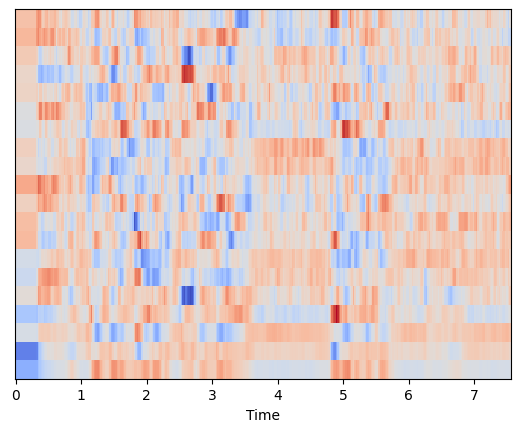

In [189]:


# Load the audio file
mfcc = librosa.feature.mfcc(mci_array, sr=SR, n_mfcc=20)

# Center MFCC coefficient dimensions to the mean and unit variance
mfcc = sklearn.preprocessing.scale(mfcc, axis=1)
librosa.display.specshow(mfcc, sr=SR, x_axis='time')

print (f'MFCC is of type {type(mfcc)} with shape {mfcc.shape}')
# MFCC is of type <class 'numpy.ndarray'> with shape (20, 134)

In [121]:
(sci_array**2).sum(), (mci_array**2).sum(), (ad_array**2).sum()

(938.45264, 728.44916, 670.14325)

In [49]:
Audio(sci_array,rate=SR)

In [101]:
S = np.abs(librosa.stft(ad_array))
librosa.amplitude_to_db(S**2).sum()
S1 = np.abs(librosa.stft(mci_array))
librosa.power_to_db(S**2).sum()
S2 = np.abs(librosa.stft(sci_array))
librosa.power_to_db(S**2).sum()

-49766444.0

In [57]:
(S**2).sum(), (S1**2).sum(), (S2**2).sum()

(387092.94, 12278035.0, 3151995.0)

In [124]:
mfcc = librosa.feature.mfcc(ad_array, sr=SR, n_mfcc=40)
(mfcc**2).sum()

/tmp/ipykernel_1192018/3734042552.py:1: FutureWarning: Pass y=[0.         0.         0.         ... 0.02601754 0.02589706 0.        ] as keyword args. From version 0.10 passing these as positional arguments will result in an error
  mfcc = librosa.feature.mfcc(ad_array, sr=SR, n_mfcc=40)


41590996.0

mci 41982948.0 55369720.0    
ad :64028108.0 41590996.0 
sci 34129024.0 55450824.0

In [26]:
def power_and_log(S):
    fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
    imgpow = librosa.display.specshow(S**2, sr=22050, y_axis='log', x_axis='time',
                                      ax=ax[0])
    ax[0].set(title='Power spectrogram')
    ax[0].label_outer()
    imgdb = librosa.display.specshow(librosa.power_to_db(S**3, ref=np.max),
                                     sr=22050, y_axis='log', x_axis='time', ax=ax[1])
    ax[1].set(title='Log-Power spectrogram')
    fig.colorbar(imgpow, ax=ax[0])
    fig.colorbar(imgdb, ax=ax[1], format="%+2.0f dB")

In [141]:
aa

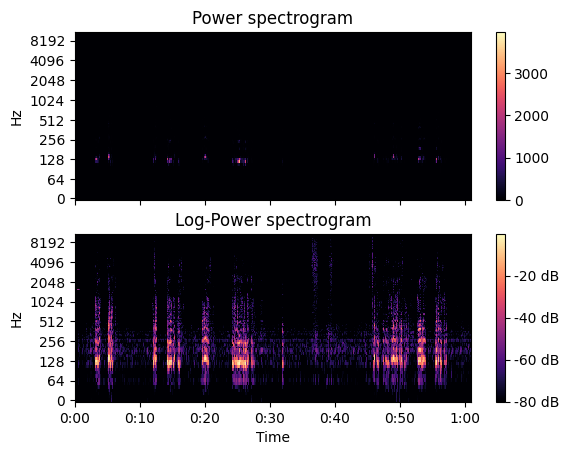

In [27]:
power_and_log(S)

In [ ]:
#연구기록
#제곱보다는 3제곱이 훨씬 값이 잘나온다.

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
imgpow = librosa.display.specshow(S2**2, sr=22050, y_axis='log', x_axis='time',
                                  ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
imgdb = librosa.display.specshow(librosa.power_to_db(S2**3, ref=np.max),
                                 sr=22050, y_axis='log', x_axis='time', ax=ax[1],)
ax[1].set(title='Log-Power spectrogram')
fig.colorbar(imgpow, ax=ax[0])
fig.colorbar(imgdb, ax=ax[1], format="%+2.0f dB")

In [ ]:
fig, ax = plt.subplots(nrows=2, sharex=True, sharey=True)
imgpow = librosa.display.specshow(S1**2, sr=22050, y_axis='log', x_axis='time',
                                  ax=ax[0])
ax[0].set(title='Power spectrogram')
ax[0].label_outer()
imgdb = librosa.display.specshow(librosa.power_to_db(S1**2, ref=np.max),
                                 sr=16000, y_axis='log', x_axis='time', ax=ax[1])
ax[1].set(title='Log-Power spectrogram')
fig.colorbar(imgpow, ax=ax[0])
fig.colorbar(imgdb, ax=ax[1], format="%+2.0f dB")

In [179]:
a = pd.DataFrame()

In [180]:
b = pd.DataFrame([[11, 22, 33], [44, 55, 66]], columns=list('cdb'))

In [181]:
a

""


In [48]:
sci_path

'/data/음성파일/치매원본음성/가천대에서받은원본/NIA/2021-NIA-FINAL-TOTAL/11/SCI/56b37be7-0716-447f-b8f7-fb9739a58506_10_R.wav'

In [183]:
a.append(b, ignore_index=True)

,c,d,b
0,11,22,33
1,44,55,66
